    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

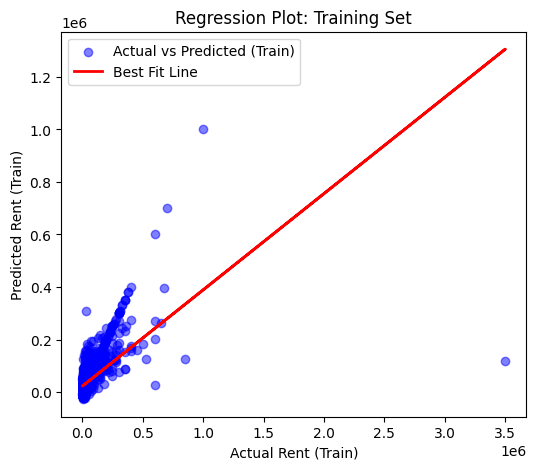

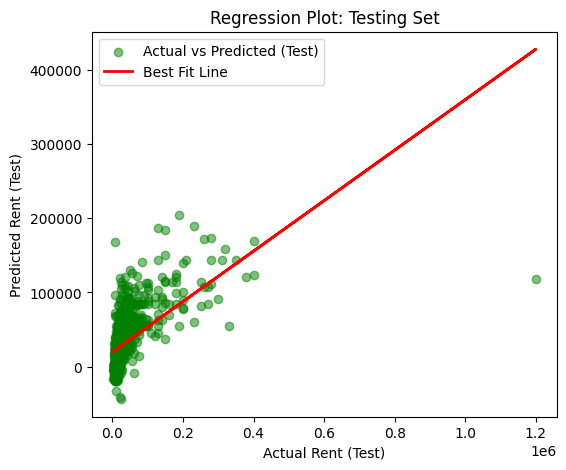

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset 
data = pd.read_csv('House_Rent_Dataset.csv')

# Strip spaces from column names to avoid errors
data.columns = data.columns.str.strip()

# Handle missing values 
data.dropna(inplace=True)

# Display first 5 rows 
print(data.head())

# Selecting relevant features and target variable
X = data[['Area Type', 'Floor', 'City', 'Bathroom']]
y = data['Rent']

# Convert categorical variables using One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Display regression coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Plot actual vs predicted values with a best-fit regression line for training set
plt.figure(figsize=(6, 5))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Actual vs Predicted (Train)')
a_train, b_train = np.polyfit(y_train, y_train_pred, 1)
plt.plot(y_train, a_train * y_train + b_train, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('Actual Rent (Train)')
plt.ylabel('Predicted Rent (Train)')
plt.title('Regression Plot: Training Set')
plt.legend()
plt.show()

# Plot actual vs predicted values with a best-fit regression line for testing set
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_test_pred, color='green', alpha=0.5, label='Actual vs Predicted (Test)')
a_test, b_test = np.polyfit(y_test, y_test_pred, 1)
plt.plot(y_test, a_test * y_test + b_test, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('Actual Rent (Test)')
plt.ylabel('Predicted Rent (Test)')
plt.title('Regression Plot: Testing Set')
plt.legend()
plt.show()
